In [1]:
import pandas as pd
import numpy as np
import PyPDF4
import textract
import re
import string
import nltk
from nltk.corpus import stopwords



In [2]:
filename = "DeepMind just took an important step towards AGI _ Fortune.pdf"

pdfFileObj = open(filename,'rb')
pdfReader = PyPDF4.PdfFileReader(pdfFileObj) 
num_pages = pdfReader.numPages



In [3]:
count = 0
text = ""
                                                            
while count < num_pages:                       #The while loop will read each page
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    
#Below if statement exists to check if the above library returned #words. It's done because PyPDF2 cannot read scanned files.

if text != "":
    text = text
    
#If the above returns as False, we run the OCR library textract to #convert scanned/image based PDF files into text

else:
    text = textract.process('http://bit.ly/epo_keyword_extraction_document', method='tesseract', language='eng')


In [4]:
sw_nltk = stopwords.words('english')

library = {}

text = text.lower()
text_np=text.translate(str.maketrans('','',string.punctuation))
text_prep = text_np.replace("\n","").replace("\r","")
words = [word for word in text_prep.split() if word.lower() not in sw_nltk]


for word in words:
    library[word]=library.get(word,0)+1
 

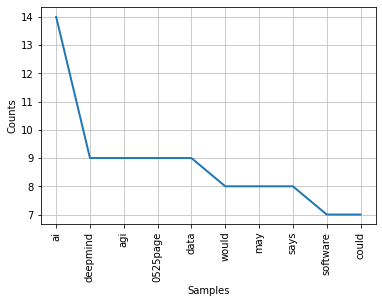

In [5]:
fd = nltk.FreqDist(words)
fd.plot(10, cumulative = False);

In [6]:
#Keyword Frequency Search

keyword = "DeepMind"
keyword = keyword.lower()
print("Keyword Frquency:", library[keyword])

Keyword Frquency: 9
